In [2]:
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

df=pd.read_csv("Iris.csv")
df





,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.isnull().sum()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


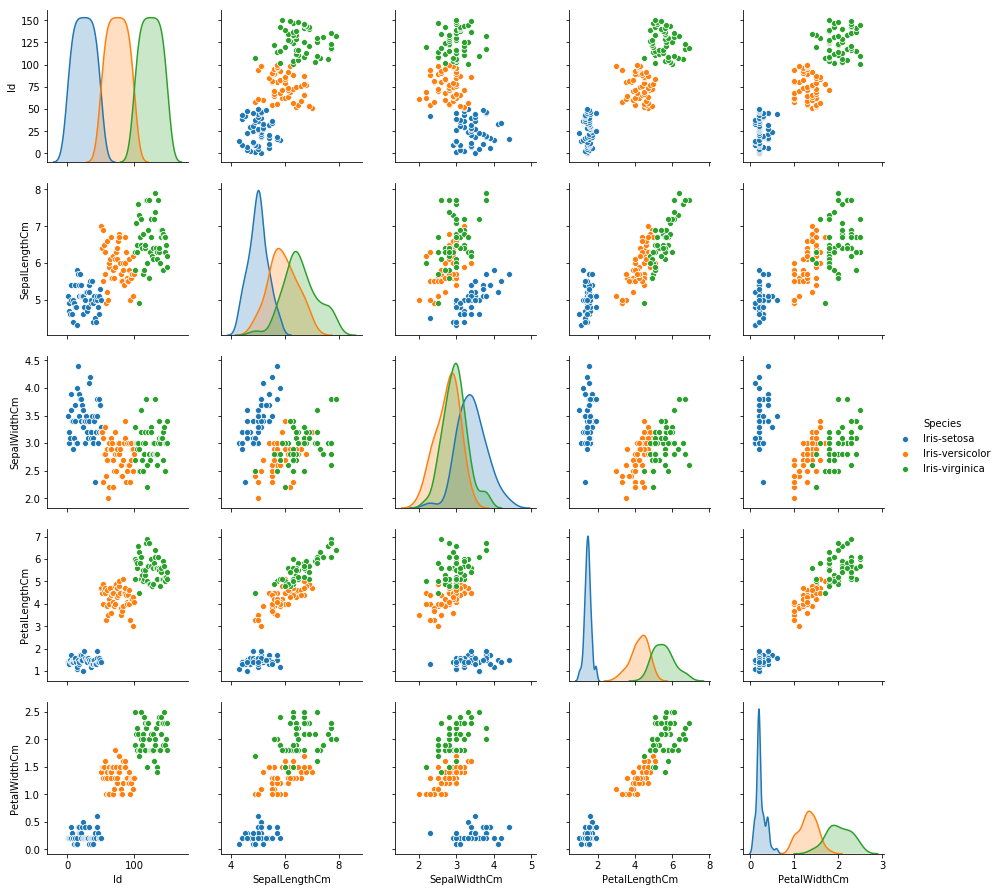

In [7]:
sns.pairplot(df, hue='Species')

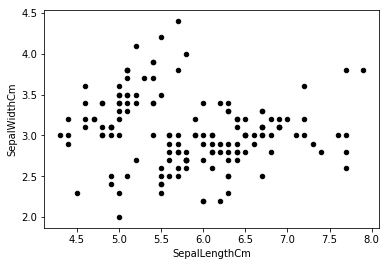

In [8]:
df.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm",color="black", alpha=1)


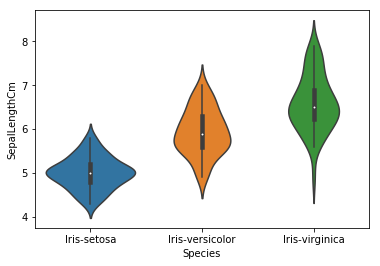

In [9]:
sns.violinplot(x='Species', y='SepalLengthCm', data=df)
plt.show()

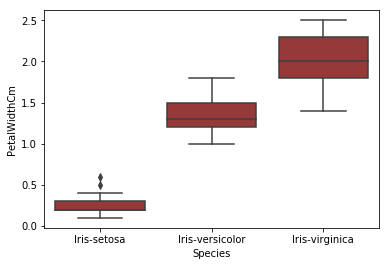

In [10]:
sns.boxplot(x="Species",y="PetalWidthCm",data=df,color="brown")


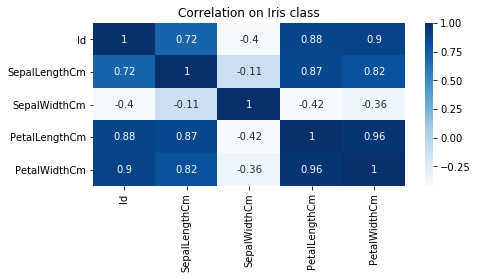

In [11]:
plt.subplots(figsize = (7,3))
sns.heatmap(df.corr(),annot=True,cmap="Blues").set_title("Correlation on Iris class")
plt.show()

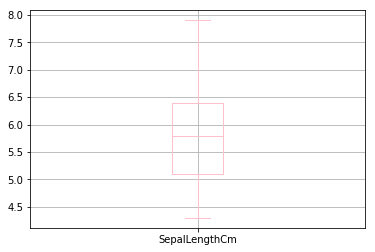

In [12]:
df.boxplot(column=['SepalLengthCm'],color="Pink")


In [13]:
df.cov()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1887.500000,25.782886,-7.492282,67.667785,29.832215
SepalLengthCm,25.782886,0.685694,-0.039268,1.273682,0.516904
SepalWidthCm,-7.492282,-0.039268,0.188004,-0.321713,-0.117981
PetalLengthCm,67.667785,1.273682,-0.321713,3.113179,1.296387
PetalWidthCm,29.832215,0.516904,-0.117981,1.296387,0.582414


In [14]:
x = df.drop(['Species'], axis =1)
y = df['Species']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state =0)


In [16]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
predictions = log_reg.predict(x_test)
print ("Logistic Regression")
print ("The Accuracy Score ", accuracy_score(y_test, predictions))
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))

C:\Python\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Python\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression
The Accuracy Score  0.95
[[16  0  0]
 [ 0 20  3]
 [ 0  0 21]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.87      0.93        23
 Iris-virginica       0.88      1.00      0.93        21

      micro avg       0.95      0.95      0.95        60
      macro avg       0.96      0.96      0.95        60
   weighted avg       0.96      0.95      0.95        60



In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model = SVC() # select the svm algorithm

# we train the algorithm with training data and training output
model.fit(x_train, y_train)
# we pass the testing data to the stored algorithm to predict the outcome
prediction = model.predict(x_test)
print("Support Vector Machines")
print('Train-The accuracy of the SVM is: ', accuracy_score(prediction, y_test)) # Accuracy check of the algorithm

Support Vector Machines
Train-The accuracy of the SVM is:  1.0


C:\Python\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
import sklearn 
import autosklearn.classification as clf

# training
model = SVC() # select the svm algorithm

# algorithm training 
model.fit(x_train, y_train)

prediction = model.predict(x_train)
print("Support Vector Machines")
print ("Train-The accuracy of the SVM is:", accuracy_score(y_test, predictions))
print ("Train - Confusion matrix :\n",confusion_matrix(y_train, clf.predict(x_train)))

#classification report 
print (classification_report(y_test, predictions))

In [ ]:
#test
from autosklearn.classification import predict
print ("Test - Accuracy :", accuracy_score(y_test, clf.predict
(x_test)))
print ("Test-Confusion matrix :\n",confusion_matrix(y_test, clf.
predict(x_test)))
print (classification_report(y_test, predictions))